# <font color='#698B69'>Sentiment Analysis of a Amazon Product.</font>

>- The link of the product that i have analyzed is 'https://www.amazon.in/boAt-Bassheads-242-Earphones-Carbon/dp/B09FSWY5BP/ref=cm_cr_arp_d_pdt_img_top?ie=UTF8'.

In [51]:
# importing dependencies
import pandas as pd
import numpy as np
import spacy
import string
import re

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

import nltk
from nltk import tokenize

In [53]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
affin = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [3]:
df = pd.read_csv('boat_Bassheads_242.csv')
df.head()

,product_name,title,stars,body
0,boAt Bassheads 242 in Ear Wired Earphones with...,Overall good package. Fond of this,5.0,"If you want durable earphone, protected from s..."
1,boAt Bassheads 242 in Ear Wired Earphones with...,After almost1 week right earplug isn't working...,1.0,"Before these earphones, I used the basic Samsu..."
2,boAt Bassheads 242 in Ear Wired Earphones with...,Best. Using it since a month now!,5.0,Best for me. If you fall in the middle categor...
3,boAt Bassheads 242 in Ear Wired Earphones with...,Horrible sound.,1.0,Worst sound. It's like someone is poking you w...
4,boAt Bassheads 242 in Ear Wired Earphones with...,Warranty issue.....How to return ?,3.0,One side of these ear plugs stopped working wi...


In [4]:
df.shape

(1630, 4)

## <font color='#698B69'>Text preprocessing</font>

In [5]:
#function for text preprocessing
def get_cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)#removes username
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text)# removes hyperlink
    text=  re.sub("[^A-Za-z" "]+"," ",text) #removes special characters
    return text

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91775\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
text = [x.strip() for x in df.body] # remove both the leading and the trailing characters
text = [x for x in text if x] # removes empty strings, because they are considered in Python as False
#text

In [14]:
#tokenize 
tokens = tokenize.sent_tokenize(" ".join(text))
tokens[5:15]

['Couldve been provided more.Overall you can surely take this if you badly need waterproofing and durability, otherwise 225/152/162 has slightly better sound.',
 'But this has volume control keys, thats a plus point.',
 'Before these earphones, I used the basic Samsung earphones which were 5 years old.And I am writing this review after 3 days of usage,daily for 3-4 hours.Pros:  1- Crystal clear & loud sound.',
 '5/52- Amazing bass.',
 '5/53-Call quality is fine.',
 '4/54- The wires are braided which make them more durable.',
 '5/5One of the most amazing features is that you get sound control buttons in this earphones which work as a charm.Cons :1- After continuous use for 45-60 mins, they cause pain in ears.2- They are MADE IN CHINA.',
 "I didn't know it before.Edit: After daily usage of almost 1 week, the right earplug is not working properly and they are causing hell lot of pain and itchiness on the ear.I am reducing the rating from 4 stars to 1.",
 "Also I have applied for replaceme

In [15]:
new_df = pd.DataFrame(tokens, columns=['sentence'])
new_df

,sentence
0,"If you want durable earphone, protected from s..."
1,Go for this.Build quality: Very good form fact...
2,"Eartips are comfortable and fits nicely, looks..."
3,Could've been thicker.
4,Extra eartips only 2 small and 2 mediums.
...,...
4232,But they are very good.... Why this is faulty....
4233,The sound quality is to good and the noise can...
4234,The product has excellent sound quality and al...
4235,It has anacceptable bass quality.The product p...


In [16]:
df['clean_text']=new_df['sentence'].apply(get_cleanText)
print(df['clean_text'])

0       If you want durable earphone protected from sw...
1       Go for this Build quality Very good form facto...
2       Eartips are comfortable and fits nicely looks ...
3                                  Could ve been thicker 
4                   Extra eartips only small and mediums 
                              ...                        
1625                                  Else piece is good 
1626    This is my nd boat and I found it worst produc...
1627    Others are different models and they still wor...
1628                                As always NO REGRETS 
1629                         It s very good for the rate 
Name: clean_text, Length: 1630, dtype: object


In [18]:
affinity_scores = affin.set_index('word')['value'].to_dict()

In [19]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

In [36]:
#function to get the sentiment score
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)# return the score if the word is in the dict otherwise 0
    return sent_score

In [41]:
calculate_sentiment(text = 'hate')


-3

In [42]:
df['sentiment_value'] = df['clean_text'].apply(calculate_sentiment)
df

,product_name,title,stars,body,clean_text,sentiment_value
0,boAt Bassheads 242 in Ear Wired Earphones with...,Overall good package. Fond of this,5.0,"If you want durable earphone, protected from s...",If you want durable earphone protected from sw...,2
1,boAt Bassheads 242 in Ear Wired Earphones with...,After almost1 week right earplug isn't working...,1.0,"Before these earphones, I used the basic Samsu...",Go for this Build quality Very good form facto...,3
2,boAt Bassheads 242 in Ear Wired Earphones with...,Best. Using it since a month now!,5.0,Best for me. If you fall in the middle categor...,Eartips are comfortable and fits nicely looks ...,6
3,boAt Bassheads 242 in Ear Wired Earphones with...,Horrible sound.,1.0,Worst sound. It's like someone is poking you w...,Could ve been thicker,0
4,boAt Bassheads 242 in Ear Wired Earphones with...,Warranty issue.....How to return ?,3.0,One side of these ear plugs stopped working wi...,Extra eartips only small and mediums,0
...,...,...,...,...,...,...
1625,boAt Bassheads 242 in Ear Wired Earphones with...,Amazing Performance..!! One of the best produc...,5.0,The product has excellent sound quality and al...,Else piece is good,3
1626,boAt Bassheads 242 in Ear Wired Earphones with...,best,5.0,boat never disappoint... all products of boats...,This is my nd boat and I found it worst produc...,-4
1627,boAt Bassheads 242 in Ear Wired Earphones with...,The sound quality,5.0,Its a good product for 500rsWhen I watching th...,Others are different models and they still wor...,5
1628,boAt Bassheads 242 in Ear Wired Earphones with...,If you are looking for best bass earphone then...,3.0,Sound quality is goodBut bass is not to much a...,As always NO REGRETS,-3


In [43]:
df['word_count'] = df['clean_text'].str.split().apply(len)
df

,product_name,title,stars,body,clean_text,sentiment_value,word_count
0,boAt Bassheads 242 in Ear Wired Earphones with...,Overall good package. Fond of this,5.0,"If you want durable earphone, protected from s...",If you want durable earphone protected from sw...,2,9
1,boAt Bassheads 242 in Ear Wired Earphones with...,After almost1 week right earplug isn't working...,1.0,"Before these earphones, I used the basic Samsu...",Go for this Build quality Very good form facto...,3,14
2,boAt Bassheads 242 in Ear Wired Earphones with...,Best. Using it since a month now!,5.0,Best for me. If you fall in the middle categor...,Eartips are comfortable and fits nicely looks ...,6,44
3,boAt Bassheads 242 in Ear Wired Earphones with...,Horrible sound.,1.0,Worst sound. It's like someone is poking you w...,Could ve been thicker,0,4
4,boAt Bassheads 242 in Ear Wired Earphones with...,Warranty issue.....How to return ?,3.0,One side of these ear plugs stopped working wi...,Extra eartips only small and mediums,0,6
...,...,...,...,...,...,...,...
1625,boAt Bassheads 242 in Ear Wired Earphones with...,Amazing Performance..!! One of the best produc...,5.0,The product has excellent sound quality and al...,Else piece is good,3,4
1626,boAt Bassheads 242 in Ear Wired Earphones with...,best,5.0,boat never disappoint... all products of boats...,This is my nd boat and I found it worst produc...,-4,143
1627,boAt Bassheads 242 in Ear Wired Earphones with...,The sound quality,5.0,Its a good product for 500rsWhen I watching th...,Others are different models and they still wor...,5,19
1628,boAt Bassheads 242 in Ear Wired Earphones with...,If you are looking for best bass earphone then...,3.0,Sound quality is goodBut bass is not to much a...,As always NO REGRETS,-3,4


In [48]:
#Top positive reviews
df.sort_values(by='sentiment_value',ascending=False).head(10)

,product_name,title,stars,body,clean_text,sentiment_value,word_count
202,boAt Bassheads 242 in Ear Wired Earphones with...,Won't suit in long run,2.0,I have been using it for a couple of months. T...,Just got this after day and i can say the qual...,30,274
938,boAt Bassheads 242 in Ear Wired Earphones with...,Quality product frm boat,5.0,"This earphones has good bass, sound ,quality a...",They say its IPX i haven t used it in such co...,29,136
760,boAt Bassheads 242 in Ear Wired Earphones with...,Stopped working after 3 months,1.0,"Quality was good until it worked, but one ear ...",I have been using it now for months Quality th...,27,82
793,boAt Bassheads 242 in Ear Wired Earphones with...,Good purchase,5.0,Good quality buildGood quality sound 💗Loved it...,There Can t be a better Product than this Tota...,26,130
1031,boAt Bassheads 242 in Ear Wired Earphones with...,Good if it lasts,3.0,Lasted for 5 months and now reduces the volume...,Recommend After using for months the best I ca...,26,112
1240,boAt Bassheads 242 in Ear Wired Earphones with...,Bad product,1.0,"Worst product I purchased till date, volume co...",And can be used for calls Super product for ga...,25,185
1555,boAt Bassheads 242 in Ear Wired Earphones with...,Headphones stopped working in 15 days.,1.0,Sound quality is ok... but the wiring is pathe...,Not even replying via email I m still using th...,22,116
321,boAt Bassheads 242 in Ear Wired Earphones with...,Ok not good,2.0,"Sound quality is not good , uncomfortable , ...",Bass amazing Sound really good Looks AMAZING P...,22,71
1090,boAt Bassheads 242 in Ear Wired Earphones with...,Review after 3 months,2.0,It's been just 3 months of the usage and one s...,Best budget earphone with good sound quality a...,20,42
1293,boAt Bassheads 242 in Ear Wired Earphones with...,Great value for money,5.0,The sound quality in this headset is far bette...,Nice product in this price rangePros noise can...,19,114


In [50]:
#Summarized sentiment
df['sentiment_value'].describe()

count    1630.000000
mean        1.708589
std         3.957771
min       -10.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        30.000000
Name: sentiment_value, dtype: float64

In [143]:
sns.set_theme(context='notebook',style='white',palette='gist_earth_r',font_scale=1.8)

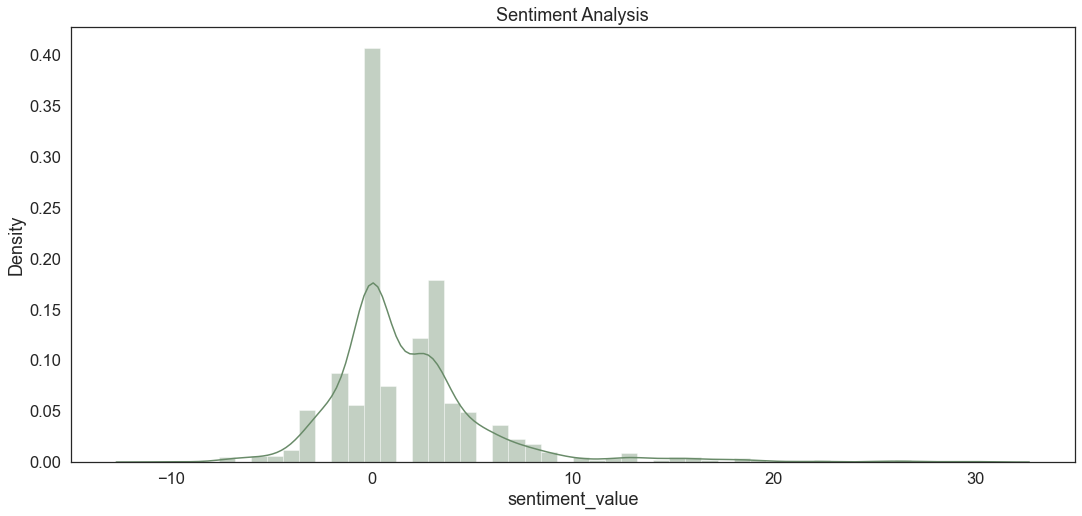

In [136]:
plt.title("Sentiment Analysis")
sns.set(rc={"figure.figsize":(18, 8)})
sns.distplot(df['sentiment_value'],color='#698B69');

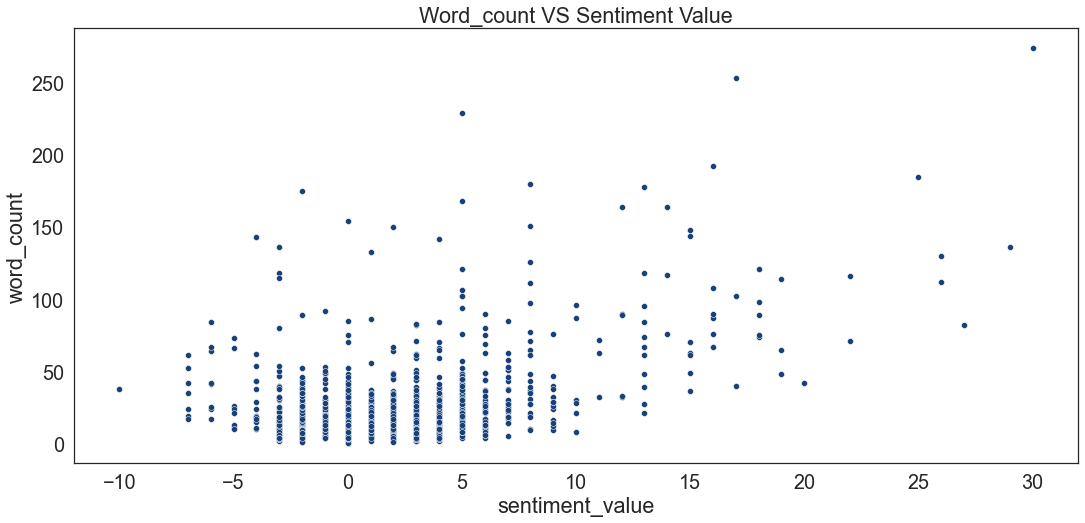

In [141]:
plt.title("Word_count VS Sentiment Value")
sns.set(rc={"figure.figsize":(18, 8)})
sns.scatterplot(x=df['sentiment_value'],y=df['word_count']);

## <font color='#698B69'> Using TextBlob </font>

In [92]:
from textblob import TextBlob

In [93]:
#function to get subjectivity
def get_Subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [97]:
#function to get polarity(positive or negative)
def get_Polarity(text):
    return TextBlob(text).sentiment.polarity

In [100]:
final_df = df.iloc[:,2:5]
final_df["subjectivity"]= final_df['clean_text'].apply(get_Subjectivity)
final_df["polarity"]= final_df['clean_text'].apply(get_Polarity)

In [101]:
final_df

,stars,body,clean_text,subjectivity,polarity
0,5.0,"If you want durable earphone, protected from s...",If you want durable earphone protected from sw...,0.000000,0.000000
1,1.0,"Before these earphones, I used the basic Samsu...",Go for this Build quality Very good form facto...,0.780000,0.910000
2,5.0,Best for me. If you fall in the middle categor...,Eartips are comfortable and fits nicely looks ...,0.536111,0.225000
3,1.0,Worst sound. It's like someone is poking you w...,Could ve been thicker,0.000000,0.000000
4,3.0,One side of these ear plugs stopped working wi...,Extra eartips only small and mediums,0.500000,-0.083333
...,...,...,...,...,...
1625,5.0,The product has excellent sound quality and al...,Else piece is good,0.600000,0.700000
1626,5.0,boat never disappoint... all products of boats...,This is my nd boat and I found it worst produc...,0.583889,0.170000
1627,5.0,Its a good product for 500rsWhen I watching th...,Others are different models and they still wor...,0.551515,0.278788
1628,3.0,Sound quality is goodBut bass is not to much a...,As always NO REGRETS,0.200000,0.050000


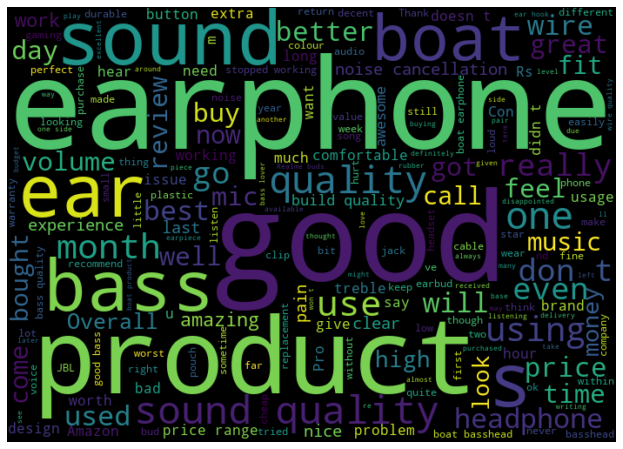

In [102]:
#plotting the words
allwords = ' '.join([word for word in final_df['clean_text']])
wc = WordCloud(width=700,height=500,random_state=4,max_font_size=150).generate(allwords)

plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show();

In [103]:
#function to compute whether a review is positive or negative
def get_score(score):
    score = float(score)
    if (score < 0):
        return 'Negative'
    elif (score == 0):
        return 'Neutral'
    elif score > 0:
        return 'Positive'
    

In [105]:
final_df['sentiment'] = final_df['polarity'].apply(get_score)

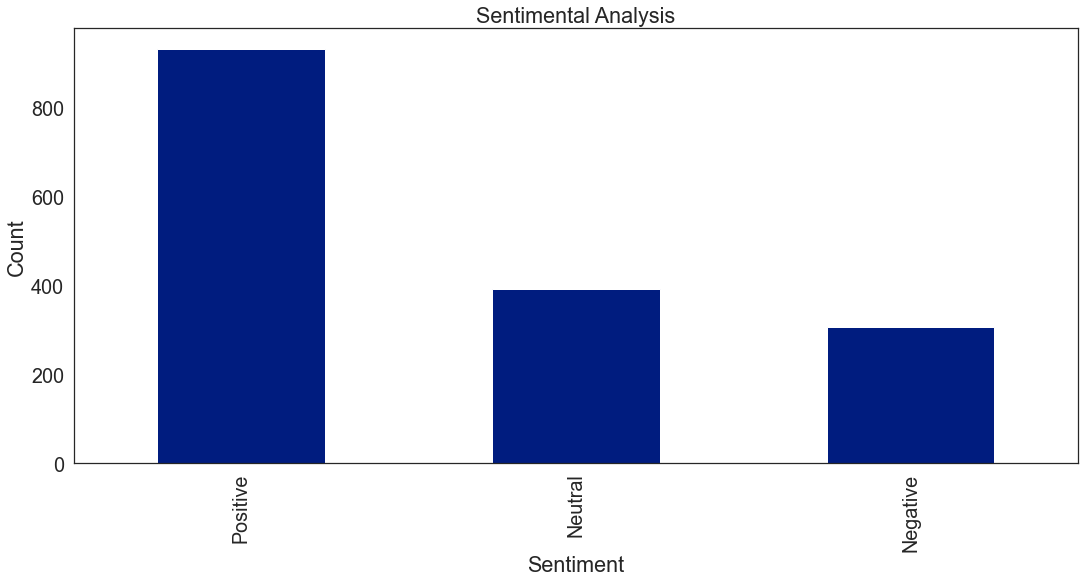

In [144]:
plt.title("Sentimental Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.style.use('seaborn-dark-palette')
final_df['sentiment'].value_counts().plot(kind='bar');

> Most of the Reviews are Positive.

In [132]:
#getting the percentage of positive tweets
positive=final_df[final_df['polarity']>0]
ptweets = positive['clean_text']
score = round(ptweets.shape[0]/final_df.shape[0] *100)
print("The percentage of positive tweets is {} %.".format(score))

The percentage of positive tweets is 57 %.
